 A Transformada de Karhunen-Loève possui a característica única de ser dependente da função de entrada, isto é, o núcleo da transformada varia conforme a função a ser transformada.
 <br>
 Os componentes principais de um conjunto de dados num espaço multidimensional podem ser determinados pelos autovetores da matriz de covariância dos dados.

In [541]:
import numpy as np
import matplotlib.pyplot as plt
nasa = np.loadtxt(fname = "DATA_NASA.txt")

<Figure size 1080x1080 with 0 Axes>

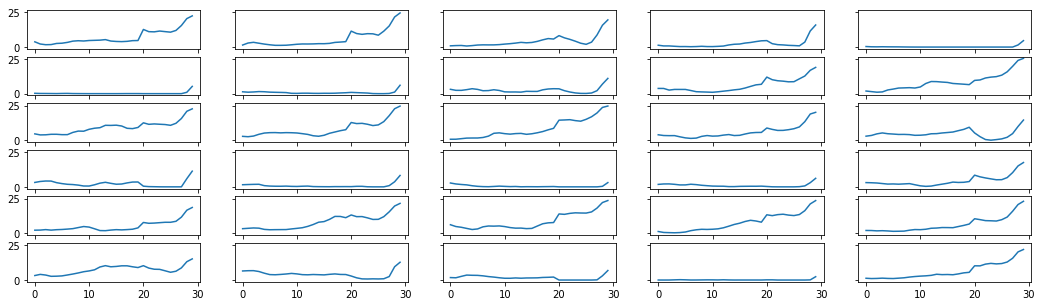

In [542]:
#nasa = nasa[0:10, 0:10]
#nasa.shape
plt.figure(figsize=(15,15))
f, ax = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True)
f.set_figheight(5)
f.set_figwidth(18)
i=0;
for n in range(6):  #row index
    for p in range(5):  # column index
        #plt.subplot(6, 5, i)
        ax[n,p].plot(nasa[i,:]);
        i = i +1
       
    

In [543]:
matcov = np.cov(nasa.T) # cada linha é uma variavel, cada coluna uma observação. por isso o transposto da matriz de dados.
vetmedia = np.mean(nasa,0)

D, avetor = np.linalg.eig(matcov)
#print('autovalores:', D, '\n matrix de autovetores: ', avetor)

nasaT = nasa.T
vetmediaT =  np.array([vetmedia.T])


A função <i>numpy.linalg.eig</i>, retorna dois valores: um vetor de autovalores <b>D</b> (NÃO NECESSARIAMENTE ORDENADOS) e o segundo uma matriz <b>avetor</b> onde cada coluna <i>avetor[:,i]</i> corresponde ao autovetor correspondente ao autovalor <i>D[i]</i>. <br>
Na análise PCA, os maiores autovalores correspondem aos componentes principais mais importantes ou, em outras palavras, os autovetores associados aos maiores autovalores apontam na direção onde os dados sofrem maior variação. Por isso, tipicamente, após o cálculo de autovetores e autovalores da matriz de covariância, o primeiro passo é a ordenação dos autovalores e seus autovetores correspondentes em ordem decrescente.

In [544]:
ind=np.argsort(D)[::-1]  # Obtém índices para ordenação decrescente dos autovalores
avetor_dec=avetor[ind]
D_dec=D[ind]


Os autovalores da matriz de covariância representam a variância que será observada quando os dados originais forem projetados no eixo dado pelo autovetor correspondente. Um determinado autovalor informa a “variância explicada” (Explained Variance) pelo seu componente principal (autovetor) correspondente.<br><br>
Tipicamente, esta variância é apresentada como uma taxa (ratio). Para isso, divide-se cada autovalor pela soma de todos autovalores obtidos.

[8.57643847e-01 7.32343212e-02 2.37416021e-02 1.84793470e-02
 1.14509185e-02 4.69840306e-03 3.57913454e-03 1.70388085e-03
 1.55456014e-03 1.02154242e-03 8.58268634e-04 6.80592416e-04
 3.62232031e-04 2.93732974e-04 2.21384946e-04 1.59043801e-04
 1.22571136e-04 8.51276939e-05 3.70778433e-05 2.27435405e-05
 1.75747085e-05 1.23738279e-05 6.78243902e-06 5.97748644e-06
 4.37942206e-06 1.88263916e-06 5.37830694e-07 2.56898888e-18
 5.41646098e-08 1.05337631e-07]


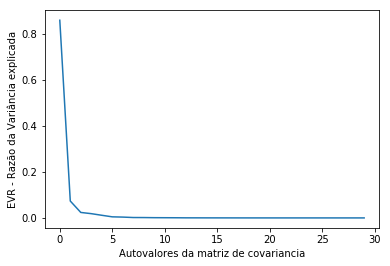

In [545]:
EVR=D/np.sum(D)

P = avetor_dec.T # fica igual a do matlab fazendo assim, exceto por alguns sinais diferentes
PT = P.T # P é uma matriz onde cada linha é um autovetor da matriz de covariancia


print(EVR)
f, ax = plt.subplots()
ax.plot(EVR)
plt.ylabel("EVR - Razão da Variância explicada")
plt.xlabel("Autovalores da matriz de covariancia");

A variância explicada mostra que cerca de 86% da variância dos dados está na direção definida pelo vetor coluna v[:,0] da matriz da autovetores <b>avetor</b>:

v:  [-0.02501002 -0.01969469 -0.01539429 -0.01509557 -0.02361323 -0.03018699
 -0.04196968 -0.05390795 -0.0662772  -0.07378211 -0.08106211 -0.08637899
 -0.09199863 -0.10266411 -0.10207523 -0.10773795 -0.11807098 -0.12645992
 -0.13100546 -0.13302216 -0.25064652 -0.24282059 -0.25334765 -0.25559869
 -0.24884104 -0.25317156 -0.28766919 -0.34947329 -0.39565526 -0.35206346]


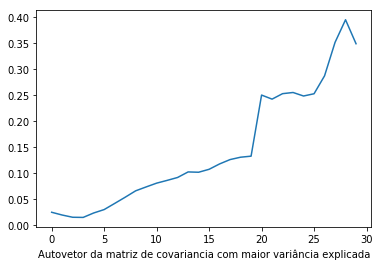

In [546]:
print('v: ',avetor[:,0]);
f, ax = plt.subplots()
ax.plot(-P[0,:]) # coluna 0 representa o autovetor 0 que obteve maior variancia explicada

plt.xlabel("Autovetor da matriz de covariancia com maior variância explicada");

O segundo autovetor apresenta cerca de 73% e o terceiro cerca de 23%. Um plot dos 30 autovetores obtidos segue na sequência:

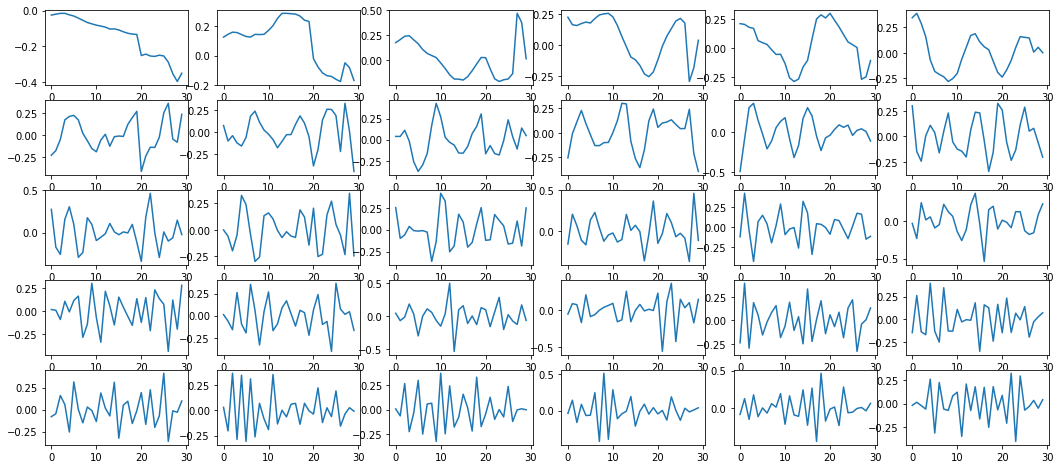

In [547]:
f, ax = plt.subplots(nrows=5, ncols=6)
f.set_figheight(8)
f.set_figwidth(18)
i=0;
for n in range(5):  #row index
    for p in range(6):  # column index
        #plt.subplot(6, 5, i)
        ax[n,p].plot(P[i,:]);
        i = i +1


Sendo a Transformada de KL definida por $y = A(x-m_x)$ onde $A$ representa uma matriz onde cada linha é um dos autovetores da matriz de covariancia dos dados,  $(x - m_x)$ representa a variação de cada componente dos dados com relação à média e $y$ é a representação do vetor $(x-m_x)$ na nova base $A^{-1}$ (dos autovetores da matriz de covariância).<br><br>
A aplicação da transformação gera um conjunto de vetores $y$ cuja média dos elementos componentes é zero ($m_y =0$) e não há correlação cruzada entre eles.

Text(0.5,0,'reconstrução dos dados originais com apenas 3 autovetores principais')

<Figure size 432x288 with 0 Axes>

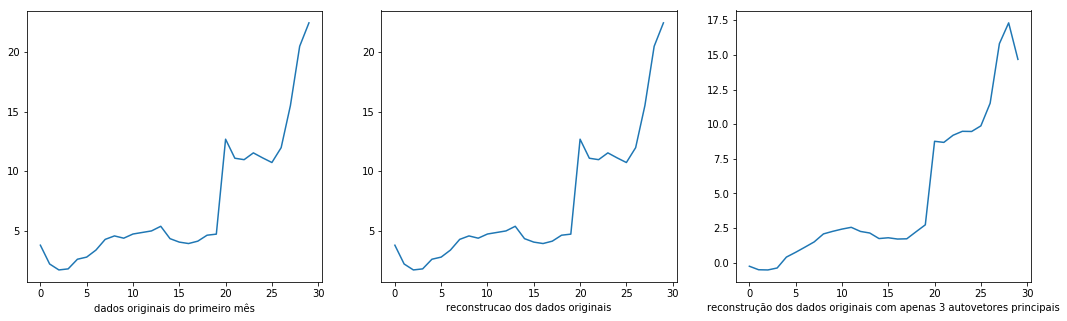

In [566]:
y = np.dot(P,(nasaT - vetmedia.T)) # obtenção das componentes por meio da transformada
Pq = P[0:6,:] # análise com apenas os maiores autovalores

yp =np.dot(Pq,(nasaT - vetmedia.T)) # obtenção das componentes por meio da transformada
x = np.dot(PT,y) + vetmedia.T #recuperação dos dados 
xq = np.dot(Pq.T,yp)# + vetmedia.T #recuperação dos dados 

plt.figure()
f, ax = plt.subplots(nrows=1, ncols=3)
f.set_figheight(5)
f.set_figwidth(18)
ax[0].plot(nasa[0,:])
ax[0].set_xlabel('dados originais do primeiro mês')


ax[1].plot(x[:,0])
ax[1].set_xlabel('reconstrucao dos dados originais')

ax[2].plot(xq[:,0]);
ax[2].set_xlabel('reconstrução dos dados originais com apenas 3 autovetores principais')

#print(Px)
#print('nasa:', nasa[29,:], '\n x10 ',x30)

<Figure size 1080x1080 with 0 Axes>

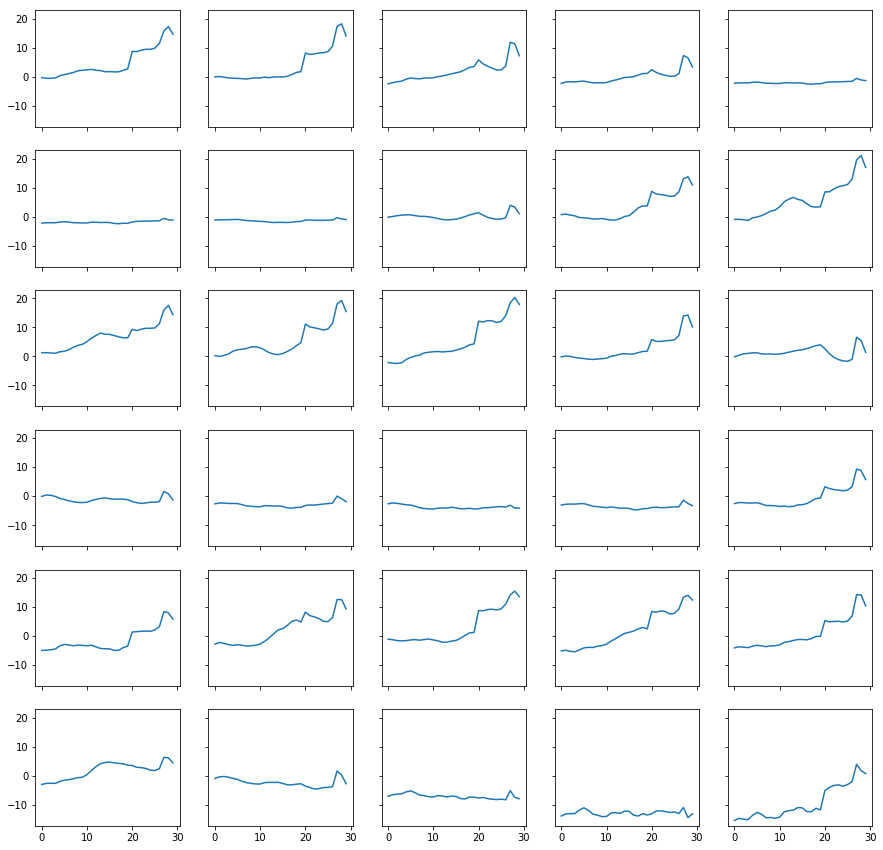

In [567]:
plt.figure(figsize=(15,15))
f, ax = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True)
f.set_figheight(15)
f.set_figwidth(15)
i=0;
for n in range(6):  #row index
    for p in range(5):  # column index
        ax[n,p].plot(xq[:,i]);
        i = i +1


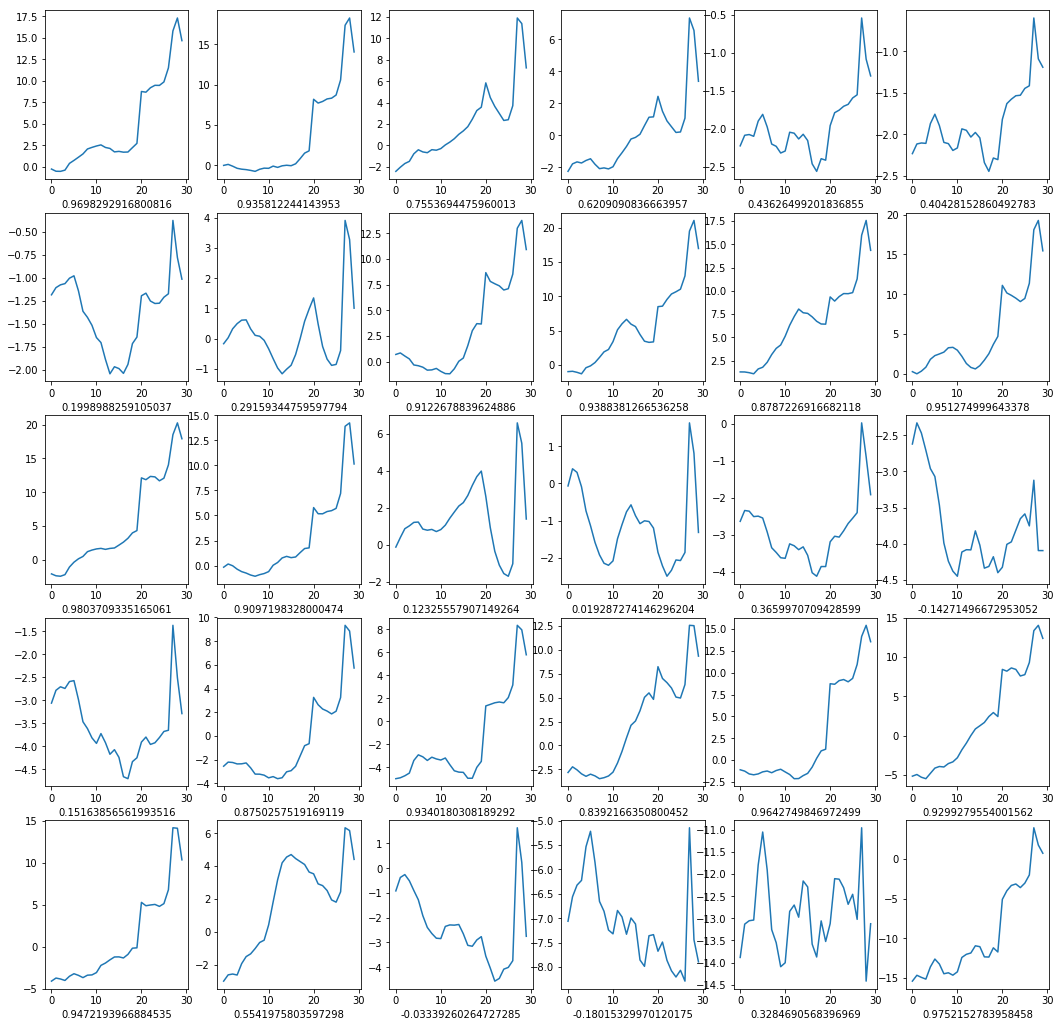

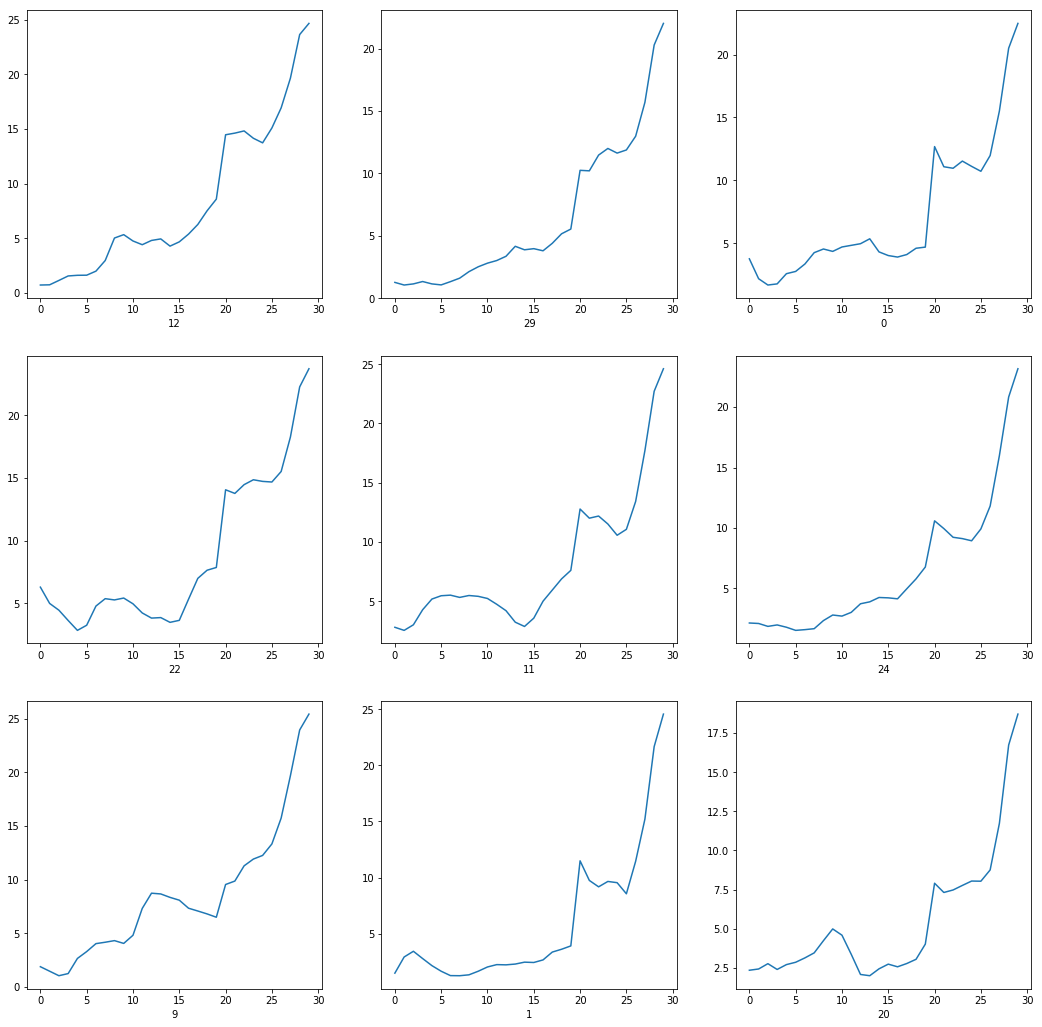

In [568]:
f, ax = plt.subplots(nrows=5, ncols=6)
f.set_figheight(18)
f.set_figwidth(18)
i=0;
idx= np.zeros((30))
for n in range(5):  #row index
    for p in range(6):  # column index
        #plt.subplot(6, 5, i)
        idx[i]=np.corrcoef(xq[:,0], nasa[i,:])[0][1]
        ax[n,p].plot(xq[:,i]);
        ax[n,p].set_xlabel( idx[i])
        i = i +1
        

ind=np.argsort(idx)[::-1]  # Obtém índices para ordenação decrescente dos autovalores
ind[1]

f, ax = plt.subplots(nrows=3, ncols=3)
f.set_figheight(18)
f.set_figwidth(18)
i = 0;
for n in range(3):  #row index
    for p in range(3):  # column index
        #plt.subplot(6, 5, i)
        ax[n,p].plot(nasa[ind[i],:]);
        ax[n,p].set_xlabel( ind[i])
        i = i +1

SyntaxError: invalid syntax (<ipython-input-571-bb0ef1b340ec>, line 2)